In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.metrics import pairwise_distances_argmin
from collections import Counter, defaultdict

In [3]:
# Function to read .csv database and convert to variables.

def read_csv():
    x = []
    y = []
    players = []
    x_label = "Average Placement"
    y_label = "Tournaments Played"
    with open('playerDB.csv', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        header = 0
        for row in reader:
            if header == 0:
                header +=1
            else:
                x.append(float(row[1]) / float(row[2]))
                y.append(float(row[2]))
                players.append(row[0])
    return x, y, x_label, y_label, players

In [4]:
# Assign values to variables

x, y, x_label, y_label, players = read_csv()

In [6]:
# Convert our (x,y) to paired array structure

X = np.vstack((x, y)).T

In [7]:
# Print header of our array

X

array([[ 13.  ,   2.  ],
       [ 21.25,   4.  ],
       [  3.  ,   1.  ],
       ...,
       [513.  ,   1.  ],
       [513.  ,   1.  ],
       [513.  ,   1.  ]])

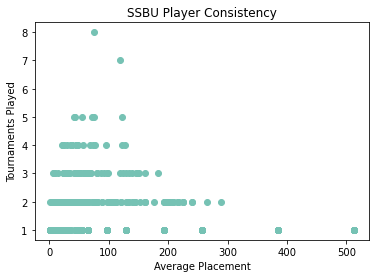

In [9]:
# Draw un-clustered graph

plt.title('SSBU Player Consistency', loc='center')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.scatter(x, y, color='#76c2b4')
plt.show()

In [18]:
# Function to find clusters using SciKit-learn K-Means Clustering

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    # Get n amount of random centroids
    i = rng.permutation(X.shape[0])[:n_clusters]
    # Save initial centroids
    centers = X[i]

    print("\nLook for converged centroids:")
    # Loops until centroids are found
    while True:
        # Assign cluster labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # Find new centers from means of points from distance
        new_centers = np.array([X[labels == i].mean(0) for i in
        range(n_clusters)])

        # Check for convergence. If old centers == new centers
        # Change to for loop if we want only a set amount of iterations
        if np.all(centers == new_centers):
            break
        centers = new_centers

        # Print iterated centroids
        print(centers)
        print()

    return centers, labels

In [19]:
# Set number of clusters

clust_num = 8


Look for converged centroids:
[[  5.92077728   1.04932735]
 [ 71.94611603   1.28908555]
 [149.81275946   1.41666667]
 [ 46.83653251   1.36842105]
 [249.95348837   1.17829457]
 [400.12727273   1.        ]
 [ 29.65546218   1.14285714]
 [ 15.47089947   1.08730159]]

[[  5.98678414   1.0660793 ]
 [ 73.49641026   1.26461538]
 [153.12552995   1.40645161]
 [ 48.5544586    1.34394904]
 [252.09677419   1.14516129]
 [400.12727273   1.        ]
 [ 30.25681663   1.17177914]
 [ 15.85700758   1.12121212]]

[[  5.98678414   1.0660793 ]
 [ 74.11128364   1.2484472 ]
 [154.82875576   1.40645161]
 [ 48.86624606   1.3533123 ]
 [253.36363636   1.12396694]
 [400.12727273   1.        ]
 [ 30.38569473   1.16837782]
 [ 15.98884758   1.14498141]]



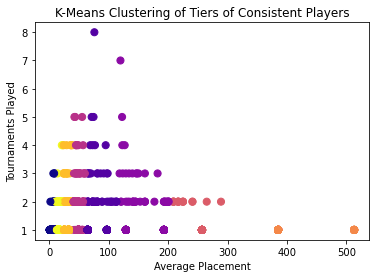

In [20]:
# Get clustered data and "print" to graph

centers, labels = find_clusters(X, clust_num)    # Can give random seed, or be defaulted
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='plasma')
plt.title('K-Means Clustering of Tiers of Consistent Players')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [21]:
# Print general information on tiers and their players

print("\nNumber of players in each tier:")
print(Counter(labels))

# Get cluster indices
clusters_indices = defaultdict(list)
for index, c in enumerate(labels):
    clusters_indices[c].append(index)

# Print players in each tier, their stats, and the tier average
x = 0 # Select tier, from 0 to clust_num - 1
print("\nTier " + str(x + 1))
print("----------")
for i in clusters_indices[x]:
    print(players[i])
print("----------")
print("Mean average placement:", centers[x][0])
print("Mean tournaments played:", centers[x][1])


Number of players in each tier:
Counter({6: 487, 1: 322, 3: 317, 7: 269, 0: 227, 2: 155, 4: 121, 5: 110})

Tier 1
----------
Magic Trumpet Man
Enif
z0mfg
Kuzanagi
Zeppo
Shuflux
Sebacena
Daybreak
Doorstop
Nicko
Kepler
Linus
Roxas
Lavish
Yoderlaheehoo
Winter
Superhero
Aquatic
The Bowz
Zenyou
Guts
BryBry
Ki
Luffs
Marley
HLB
Ant
JTab
| Gappy
Kiyarash
Key
Christian
rm8
chcrain
Nicon
HM
Ferolyo
Freetox_
Tropped
Xenesic
Kace
Hugeaux
Lioko
Tofchrist
Ipove
Lucario Galactique
Neibaf
Yanos
Raven
Luugi
Raime
RMH Henryk
Agent
Tarik
Gigglezz
honey_o
SP1
Xcurr but who?
snowglobes
Some Absol
Hareta
Gabriel395
Zeno
44
Yonie
Rem
Tedix
Beetlejuz
davez
Wolfy
Eddy
Silverfox
Infamous
GOHAN
Zeppeli
Doodlebob
Panchos
Mister Toon
JuMpZ
PaniKing
spot
Tr33
Wobbie
Citadel
Lights
Jeepers
MinMineral
Lil Jay
Genetic
Ace$
Daige
DezoTwist
Penne
Sudo
Johnnylaw
Blender
Gabs
lukey
Balltze
Pochacco
IX5
Jellyfish
Chag
SuperStriker
Klein
Ratking
Micro
Frøst
Amalthus
xXBig_Boner_Owner_39Xx
LMan
Stronghold
Ra
Nalga
Yael
Miss